In [1]:
# 這個Jupyter Notebook的環境
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

C:\Users\Java\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Platform: Windows-10-10.0.16299-SP0
Tensorflow version: 1.5.0
Keras version: 2.1.3


Using TensorFlow backend.


In [2]:
import os, shutil
# 專案的根目錄路徑
ROOT_DIR = os.getcwd()

# 置放coco圖像資料與標註資料的目錄
DATA_PATH = os.path.join(ROOT_DIR, "data")

# 原始數據集的路徑 ./data/train
original_dataset_dir = os.path.join(DATA_PATH, "train")

# 存儲小數據集的目錄 ./data/cats_and_dogs_small
base_dir = os.path.join(DATA_PATH, "cats_and_dogs_small")
if not os.path.exists(base_dir): 
    os.mkdir(base_dir)
    
#----------------------------------------------------------

# 我們的訓練資料的目錄 ./data/cats_and_dogs_small/train
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): 
    os.mkdir(train_dir)

# 我們的驗證資料的目錄 ./data/cats_and_dogs_small/validation
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir): 
    os.mkdir(validation_dir)

# 我們的測試資料的目錄 ./data/cats_and_dogs_small/test
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
#----------------------------------------------------------  

# 貓的圖片的訓練資料目錄 ./data/cats_and_dogs_small/train/cats
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# 狗的圖片的訓練資料目錄 ./data/cats_and_dogs_small/train/dogs
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
    
# 貓的圖片的驗證資料目錄 ./data/cats_and_dogs_small/validation/cats
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# 狗的圖片的驗證資料目錄 ./data/cats_and_dogs_small/validation/dogs
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
    
# 貓的圖片的測試資料目錄 ./data/cats_and_dogs_small/test/cats
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# 狗的圖片的測試資料目錄 ./data/cats_and_dogs_small/testdogs
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
    
#----------------------------------------------------------

# 複製前1000個貓的圖片到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 cat images to train_cats_dir complete!')

# 複製下500個貓的圖片到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to validation_cats_dir complete!')

# 複製下500個貓的圖片到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to test_cats_dir complete!')

# 複製前1000個狗的圖片到train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 dog images to train_dogs_dir complete!')


# 複製下500個狗的圖片到validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 dog images to validation_dogs_dir complete!')

# C複製下500個狗的圖片到test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
    
print('Copy next 500 dog images to test_dogs_dir complete!\n')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

Copy first 1000 cat images to train_cats_dir complete!
Copy next 500 cat images to validation_cats_dir complete!
Copy next 500 cat images to test_cats_dir complete!
Copy first 1000 dog images to train_dogs_dir complete!
Copy next 500 dog images to validation_dogs_dir complete!
Copy next 500 dog images to test_dogs_dir complete!

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# 特徵提取 (feature extraction)
特徵提取包括了使用預訓練好的網絡模型來從新樣本中提取特徵。這些特徵通過一個"新"的分類器(從頭開始訓練)。

實例化一個VGG16模型：

In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False, # 在這裡告訴 keras我們只需要卷積基底的權重模型資訊
                  input_shape=(150, 150, 3)) # 宣告我們要處理的圖像大小與顏色通道數

我們向構造函數傳遞了三個參數：

weights, 指定從哪個權重檢查點從中初始化模型

include_top, 這是指在網絡頂部要包括或不包含密集連接的分類器。默認情況下，這個密集連接的分類器將對應於ImageNet的1000個類別。因為我們打算用自己建構的分類器（只有兩個類別，貓和狗），因此我們不需要包括它。

input_shape, 我們將餵進到網絡的圖像張量的形狀(shape)。這個參數純粹是可選的：如果我們設定，那麼網絡將能夠處理任何大小的輸入。
以下是VGG16“卷積基底”架構的細節：它與您已經熟悉的簡單卷積網絡(convnets)非常相似。

In [4]:
conv_base.summary() # 打印一下模型資訊

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

## 方法1: 卷積基底:提取特徴 + 串接新的密集分類層:重新訓練

我們來看看設置第一種方法所需的程式碼：在我們的數據上記錄“conv_base”的輸出，並使用這些輸出作為新模型的輸入。

我們將首先簡單地運行以前介紹的“ImageDataGenerator”的實例，以將圖像提取為Numpy數組及其標籤。我們將通過調用`conv_base`模型的`predict`方法從這些圖像中提取特徵。

### 移花

In [5]:
##特徵提取

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# base_dir = 'data/5_1/cats_and_dogs_small'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255) # 產生一個"圖像資料產生器"物件

batch_size = 20 # 設定每次產生的圖像的數據批量

# 提取圖像特徵
def extract_features(directory, sample_count): # 影像的目錄, 要處理的圖像數
    features = np.zeros(shape=(sample_count, 4, 4, 512)) # 根據VGG16(卷積基底)的最後一層的輪出張量規格
    labels = np.zeros(shape=(sample_count)) # 要處理的圖像數
    
    # 產生一個"圖像資料產生器"實例(資料是在檔案目錄中), 每呼叫它一次, 它會吐出特定批次數的圖像資料
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),  # 設定圖像的高(height)與寬(width)
        batch_size=batch_size,   # 設定每次產生的圖像的數據批量
        class_mode='binary')     # 因為我們的目標資料集只有兩類(cat & dog)
    
    # 讓我們把訓練資料集所有的圖像都跑過一次
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) # 透過“卷積基底”來淬取圖像特徵
        features[i * batch_size : (i + 1) * batch_size] = features_batch # 把特徴先存放起來
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch #把標籤先存放起來
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    
    print('extract_features complete!')
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000) # 訓練資料的圖像特徵淬取
validation_features, validation_labels = extract_features(validation_dir, 1000) # 驗證資料的圖像特徵淬取
test_features, test_labels = extract_features(test_dir, 1000) # 測試資料的圖像特徵淬取

Found 2000 images belonging to 2 classes.
extract_features complete!
Found 1000 images belonging to 2 classes.
extract_features complete!
Found 1000 images belonging to 2 classes.
extract_features complete!


提取的特徵當前是（樣本數，4，4，512）的形狀。我們將它們餵給一個密集連接(densely-connected)的分類器，所以首先我們必須把它們壓扁(flatten)成（樣本數, 8192）:

In [6]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

### 接木

在這個時間點上，我們可以定義我們密集連接(densely-connected)的分類器（注意使用dropout來進行正規化），並對我們剛剛記錄的數據和標籤進行訓練：

In [7]:
from keras import models
from keras import layers
from keras import optimizers

# 產生一個新的密集連接層來做為分類器
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) # 因為我的資料集只有兩類(cat & dog)

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

# 把透過預處理的卷積基底所提取的特徵做為input來進行訓練
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 739us/step - loss: 0.5946 - acc: 0.6680 - val_loss: 0.4501 - val_acc: 0.8310
Epoch 2/30
2000/2000 [==============================] - 1s 531us/step - loss: 0.4248 - acc: 0.8085 - val_loss: 0.3626 - val_acc: 0.8700
Epoch 3/30
2000/2000 [==============================] - 1s 530us/step - loss: 0.3521 - acc: 0.8535 - val_loss: 0.3229 - val_acc: 0.8750
Epoch 4/30
2000/2000 [==============================] - 1s 526us/step - loss: 0.3035 - acc: 0.8730 - val_loss: 0.2975 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 1s 549us/step - loss: 0.2870 - acc: 0.8810 - val_loss: 0.2880 - val_acc: 0.8790
Epoch 6/30
2000/2000 [==============================] - 1s 543us/step - loss: 0.2728 - acc: 0.8910 - val_loss: 0.2839 - val_acc: 0.8780
Epoch 7/30
2000/2000 [==============================] - 1s 543us/step - loss: 0.2407 - acc: 0.9070 - val_loss: 0.2643 - val_acc: 0.8930


訓練非常快，因為我們只需要處理兩個Dense層：即使在CPU上，每個訓練循環(epoch)也需要不到一秒的時間。

讓我們來看看訓練過程中的損失(loss)和精準度(accuracy):

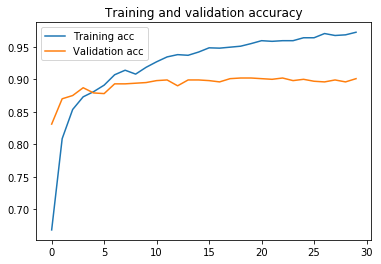

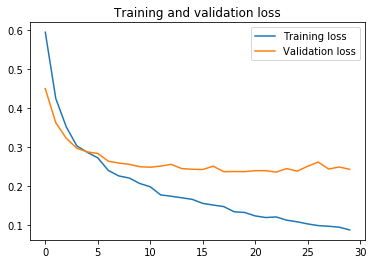

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


img_path = 'C:\\Users\\Java\\tensorflow\\testdog\\data\\cats_and_dogs_small\\test\\cats\\cat.1507.jpg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

imgfeature = conv_base.predict(x)
imgfeature = np.reshape(imgfeature, (1, 4 * 4 * 512))
print(imgfeature.shape)
result = model.predict(imgfeature)
generator.class_indices
generator.filenames
model.predict(imgfeature)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
#print('Predicted:', decode_predictions(preds))


(1, 8192)


NameError: name 'generator' is not defined

## 方法2: (卷積基底:凍結 + 串接新的密集分類層) >> 重新訓練

現在，我們來回顧一下我們提到的第二種特徵提取技術，這種方法要慢得多，而且會花更多的時間與計算資源，但是我們可以在訓練過程中利用數據擴充(data augmentation): 擴展conv_base模型，並進行端(end)對端(end)的訓練。

請注意，這種手法真的是非常昂貴的，所以只有在你有GPU時才應該嘗試它：在CPU上是絕對棘手的。如果您無法在GPU上運行代碼，那麼前一個手法就是你要選的路。

因為模型的行為就像堆積木，所以你可以添加一個模型（像我們的conv_base）到Sequential模型，就像添加一個圖層一樣。所以你可以執行以下操作：

### 移花+接木

In [10]:
from keras import models
from keras import layers

model = models.Sequential() # 產生一個新的網絡模型結構
model.add(conv_base)        # 把預訓練的卷積基底疊上去
model.add(layers.Flatten()) # 打平
model.add(layers.Dense(256, activation='relu'))  # 疊上新的密集連接層來做為分類器
model.add(layers.Dense(1, activation='sigmoid')) # 因為我的資料集只有兩類(cat & dog)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 看一下“凍結前”有多少可以被訓練的權重
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [13]:
# “凍結”卷積基底
conv_base.trainable = False

In [14]:
# 再看一下“凍結後”有多少可以被訓練的權重
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 請注意: 驗證用的資料不要進行資料的增強
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 圖像資料的目錄
        train_dir,
        # 設定圖像的高(height)與寬(width)
        target_size=(150, 150),
        batch_size=20,
        # 因為我們的目標資料集只有兩類(cat & dog)
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 79s - loss: 0.2654 - acc: 0.8930 - val_loss: 0.2480 - val_acc: 0.9030
Epoch 2/30
 - 78s - loss: 0.2679 - acc: 0.8790 - val_loss: 0.2483 - val_acc: 0.9000
Epoch 3/30
 - 78s - loss: 0.2655 - acc: 0.8920 - val_loss: 0.2445 - val_acc: 0.9030
Epoch 4/30
 - 78s - loss: 0.2694 - acc: 0.8760 - val_loss: 0.2628 - val_acc: 0.8960
Epoch 5/30
 - 78s - loss: 0.2718 - acc: 0.8830 - val_loss: 0.2447 - val_acc: 0.9050
Epoch 6/30
 - 78s - loss: 0.2612 - acc: 0.8880 - val_loss: 0.2498 - val_acc: 0.9030
Epoch 7/30
 - 78s - loss: 0.2614 - acc: 0.8890 - val_loss: 0.2523 - val_acc: 0.8980
Epoch 8/30
 - 78s - loss: 0.2659 - acc: 0.8795 - val_loss: 0.2490 - val_acc: 0.9030
Epoch 9/30
 - 78s - loss: 0.2585 - acc: 0.8815 - val_loss: 0.2489 - val_acc: 0.9020
Epoch 10/30
 - 78s - loss: 0.2535 - acc: 0.8860 - val_loss: 0.2437 - val_acc: 0.9040
Epoch 11/30
 - 78s - loss: 0.2609 - acc: 0.8830 - val_loss: 0.2451 - val_ac

In [23]:
model.save('cats_and_dogs_small_3.h5') # 把模型儲存到檔案

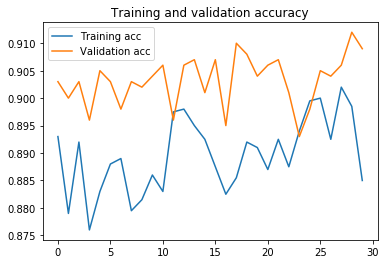

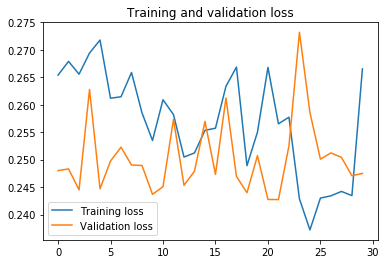

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 微調 (fine-tuning)

另一種廣泛使用的模型重覆利用技術，與_特徵提取(feature extraction)_相輔相成，是 _(微調) fine-tuning_。

微調包括解凍用於特徵提取的凍結模型庫中的幾個頂層(top layers)，並且共同訓練新添加的模型部分（在我們的範例中是完全連接的分類器）和這些頂層。這被稱為“微調(fine-tuning)”，因為它稍微調整正在重複使用的模型中更抽象的表示，以使它們與當前的要處理的問題更相關。

![fine-tuning VGG16](https://s3.amazonaws.com/book.keras.io/img/ch5/vgg16_fine_tuning.png)

In [22]:
conv_base.trainable = True # 解凍 "卷積基底"

# 所有層直到block4_pool都應該被凍結，而 block5_conv1，block5_conv2, block5_conv3 及 block5_pool則被解凍        
layers_frozen = ['block5_conv1','block5_conv2', 'block5_conv3', 'block5_pool']
for layer in conv_base.layers:
    if layer.name in layers_frozen:
        layer.trainable = True
    else:
        layer.trainable = False
        
# 把每一層是否可以被"trainable"的flat打印出來
for layer in conv_base.layers:
    print("{}: {}".format(layer.name, layer.trainable))

input_1: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: True
block5_conv2: True
block5_conv3: True
block5_pool: True


In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5), # 使用小的learn rate
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 113s 1s/step - loss: 0.2845 - acc: 0.8740 - val_loss: 0.2685 - val_acc: 0.8980
Epoch 2/100
100/100 [==============================] - 111s 1s/step - loss: 0.2507 - acc: 0.8915 - val_loss: 0.2366 - val_acc: 0.9120
Epoch 3/100
100/100 [==============================] - 111s 1s/step - loss: 0.2316 - acc: 0.9000 - val_loss: 0.2257 - val_acc: 0.9270
Epoch 4/100
100/100 [==============================] - 111s 1s/step - loss: 0.2056 - acc: 0.9145 - val_loss: 0.2267 - val_acc: 0.9270
Epoch 5/100
100/100 [==============================] - 111s 1s/step - loss: 0.2125 - acc: 0.9100 - val_loss: 0.2065 - val_acc: 0.9250
Epoch 6/100
100/100 [==============================] - 111s 1s/step - loss: 0.1798 - acc: 0.9280 - val_loss: 0.2131 - val_acc: 0.9190
Epoch 7/100
100/100 [==============================] - 111s 1s/step - loss: 0.1873 - acc: 0.9160 - val_loss: 0.2384 - val_acc: 0.9160
Epoch 8/100
100/100 [==============================] - 111s 1s

Epoch 62/100
100/100 [==============================] - 111s 1s/step - loss: 0.0377 - acc: 0.9870 - val_loss: 0.3233 - val_acc: 0.9300
Epoch 63/100
100/100 [==============================] - 111s 1s/step - loss: 0.0262 - acc: 0.9895 - val_loss: 0.2893 - val_acc: 0.9360
Epoch 64/100
100/100 [==============================] - 111s 1s/step - loss: 0.0332 - acc: 0.9855 - val_loss: 0.3148 - val_acc: 0.9240
Epoch 65/100
100/100 [==============================] - 111s 1s/step - loss: 0.0313 - acc: 0.9915 - val_loss: 0.3289 - val_acc: 0.9350
Epoch 66/100
100/100 [==============================] - 111s 1s/step - loss: 0.0337 - acc: 0.9865 - val_loss: 0.2915 - val_acc: 0.9370
Epoch 67/100
100/100 [==============================] - 111s 1s/step - loss: 0.0273 - acc: 0.9900 - val_loss: 0.2954 - val_acc: 0.9370
Epoch 68/100
100/100 [==============================] - 111s 1s/step - loss: 0.0334 - acc: 0.9870 - val_loss: 0.3362 - val_acc: 0.9240
Epoch 69/100
100/100 [==============================] -

In [25]:
model.save('cats_and_dogs_small_4.h5')

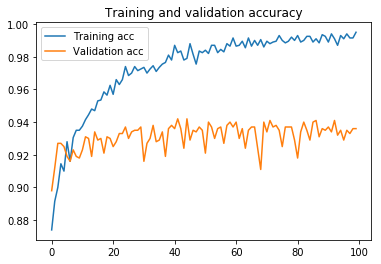

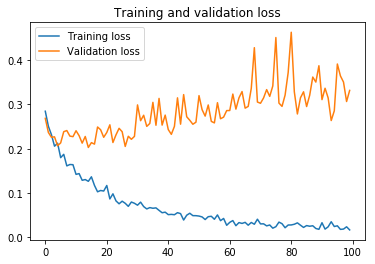

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

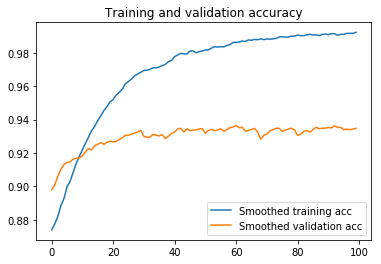

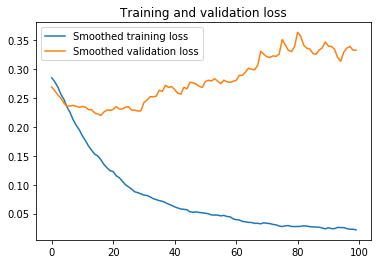

In [27]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9339999914169311
